In [2]:
# !unzip -q ./home-data-for-ml-course.zip

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [4]:
df = pd.read_csv('./train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

In [7]:
nan_col = df.isna().sum()
nan_col = nan_col[nan_col > 0]
nan_col

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
df.shape[0]

1460

In [9]:
col_to_drop = df.columns[df.isna().sum() > df.shape[0]*0.7] #дропнем только колонки где количество нанов превышает 70%
df = df.drop(columns=col_to_drop).drop(columns=['Id'])


In [10]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [12]:
for col in df.columns:
    print(f'{col} - {df[col].unique()[:5] if len(df[col].unique()) > 20 else df[col].unique()}')
    print()

MSSubClass - [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

MSZoning - ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage - [65. 80. 68. 60. 84.]

LotArea - [ 8450  9600 11250  9550 14260]

Street - ['Pave' 'Grvl']

LotShape - ['Reg' 'IR1' 'IR2' 'IR3']

LandContour - ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities - ['AllPub' 'NoSeWa']

LotConfig - ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope - ['Gtl' 'Mod' 'Sev']

Neighborhood - ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel']

Condition1 - ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2 - ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType - ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle - ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

OverallQual - [ 7  6  8  5  9  4 10  3  1  2]

OverallCond - [5 8 6 7 4 2 3 9 1]

YearBuilt - [2003 1976 2001 1915 2000]

YearRemodAdd - [2003 1976 2002 1970 2000]

RoofStyle - ['Gable' 'Hip' 'Gambrel' 'Mans

In [13]:
num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', \
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',\
            'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',\
            'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', \
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',\
            'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] #MSSubClass - ?
target_name = 'SalePrice'
cat_cols = list(set(df.columns) - set(num_cols) - {target_name})
# cat_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig' \
#             'LandSlope', 'Neighborhood', ]


In [14]:
# target = df['SalePrice']
# num_cols = [i for i in df.columns if df[i].dtype in ['int64', 'float64']]
# cat_cols = [i for i in df.columns if df[i].dtype in ['object'] and df[i].nunique() < 10]

In [15]:
len(num_cols) + len(cat_cols)

75

In [16]:
list(cat_cols)

['HeatingQC',
 'BsmtCond',
 'HouseStyle',
 'Electrical',
 'LandContour',
 'BsmtHalfBath',
 'Exterior2nd',
 'HalfBath',
 'BldgType',
 'GarageFinish',
 'BsmtFullBath',
 'Street',
 'SaleType',
 'ExterQual',
 'BsmtFinType1',
 'Condition1',
 'CentralAir',
 'FireplaceQu',
 'BsmtFinType2',
 'GarageType',
 'Fireplaces',
 'LotConfig',
 'Neighborhood',
 'GarageCars',
 'KitchenAbvGr',
 'SaleCondition',
 'Utilities',
 'ExterCond',
 'Foundation',
 'LotShape',
 'LandSlope',
 'RoofStyle',
 'MasVnrType',
 'RoofMatl',
 'MSZoning',
 'FullBath',
 'PavedDrive',
 'BsmtQual',
 'BsmtExposure',
 'Condition2',
 'GarageCond',
 'Heating',
 'Exterior1st',
 'Functional',
 'KitchenQual',
 'GarageQual']

In [17]:
nan_num_cols = df[num_cols].isna().sum()
nan_num_cols = nan_num_cols[nan_num_cols > 0].index
df[nan_num_cols] = df[nan_num_cols].fillna(df[nan_num_cols].mean())

In [18]:
nan_cat_cols = df[cat_cols].isna().sum()
nan_cat_cols = nan_cat_cols[nan_cat_cols > 0]
nan_cat_cols

BsmtCond         37
Electrical        1
GarageFinish     81
BsmtFinType1     37
FireplaceQu     690
BsmtFinType2     38
GarageType       81
MasVnrType      872
BsmtQual         37
BsmtExposure     38
GarageCond       81
GarageQual       81
dtype: int64

In [19]:
df = df.drop(df[df['Electrical'].isna()].index)

In [20]:
df[cat_cols] = df[cat_cols].fillna('NoInfo')

In [21]:
df[cat_cols].isna().sum()

HeatingQC        0
BsmtCond         0
HouseStyle       0
Electrical       0
LandContour      0
BsmtHalfBath     0
Exterior2nd      0
HalfBath         0
BldgType         0
GarageFinish     0
BsmtFullBath     0
Street           0
SaleType         0
ExterQual        0
BsmtFinType1     0
Condition1       0
CentralAir       0
FireplaceQu      0
BsmtFinType2     0
GarageType       0
Fireplaces       0
LotConfig        0
Neighborhood     0
GarageCars       0
KitchenAbvGr     0
SaleCondition    0
Utilities        0
ExterCond        0
Foundation       0
LotShape         0
LandSlope        0
RoofStyle        0
MasVnrType       0
RoofMatl         0
MSZoning         0
FullBath         0
PavedDrive       0
BsmtQual         0
BsmtExposure     0
Condition2       0
GarageCond       0
Heating          0
Exterior1st      0
Functional       0
KitchenQual      0
GarageQual       0
dtype: int64

In [22]:
df.isna().sum().value_counts()

0    76
Name: count, dtype: int64

In [23]:
target = df[target_name]
df = df.drop(target_name, axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [25]:
df[cat_cols]

,HeatingQC,BsmtCond,HouseStyle,Electrical,LandContour,BsmtHalfBath,Exterior2nd,HalfBath,BldgType,GarageFinish,...,PavedDrive,BsmtQual,BsmtExposure,Condition2,GarageCond,Heating,Exterior1st,Functional,KitchenQual,GarageQual
0,Ex,TA,2Story,SBrkr,Lvl,0,VinylSd,1,1Fam,RFn,...,Y,Gd,No,Norm,TA,GasA,VinylSd,Typ,Gd,TA
1,Ex,TA,1Story,SBrkr,Lvl,1,MetalSd,0,1Fam,RFn,...,Y,Gd,Gd,Norm,TA,GasA,MetalSd,Typ,TA,TA
2,Ex,TA,2Story,SBrkr,Lvl,0,VinylSd,1,1Fam,RFn,...,Y,Gd,Mn,Norm,TA,GasA,VinylSd,Typ,Gd,TA
3,Gd,Gd,2Story,SBrkr,Lvl,0,Wd Shng,0,1Fam,Unf,...,Y,TA,No,Norm,TA,GasA,Wd Sdng,Typ,Gd,TA
4,Ex,TA,2Story,SBrkr,Lvl,0,VinylSd,1,1Fam,RFn,...,Y,Gd,Av,Norm,TA,GasA,VinylSd,Typ,Gd,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Ex,TA,2Story,SBrkr,Lvl,0,VinylSd,1,1Fam,RFn,...,Y,Gd,No,Norm,TA,GasA,VinylSd,Typ,TA,TA
1456,TA,TA,1Story,SBrkr,Lvl,0,Plywood,0,1Fam,Unf,...,Y,Gd,No,Norm,TA,GasA,Plywood,Min1,TA,TA
1457,Ex,Gd,2Story,SBrkr,Lvl,0,CmentBd,0,1Fam,RFn,...,Y,TA,No,Norm,TA,GasA,CemntBd,Typ,Gd,TA
1458,Gd,TA,1Story,FuseA,Lvl,0,MetalSd,0,1Fam,Unf,...,Y,TA,Mn,Norm,TA,GasA,MetalSd,Typ,Gd,TA


In [26]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [27]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cat_cols = encoder.fit_transform(df[cat_cols])
encoded_cat_cols_df = pd.DataFrame(encoded_cat_cols, columns=encoder.get_feature_names_out(cat_cols), index=df.index)
df = df.drop(columns=cat_cols)
df = pd.concat([df, encoded_cat_cols_df], axis=1)
df


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional_Sev,Functional_Typ,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_NoInfo,GarageQual_Po,GarageQual_TA
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


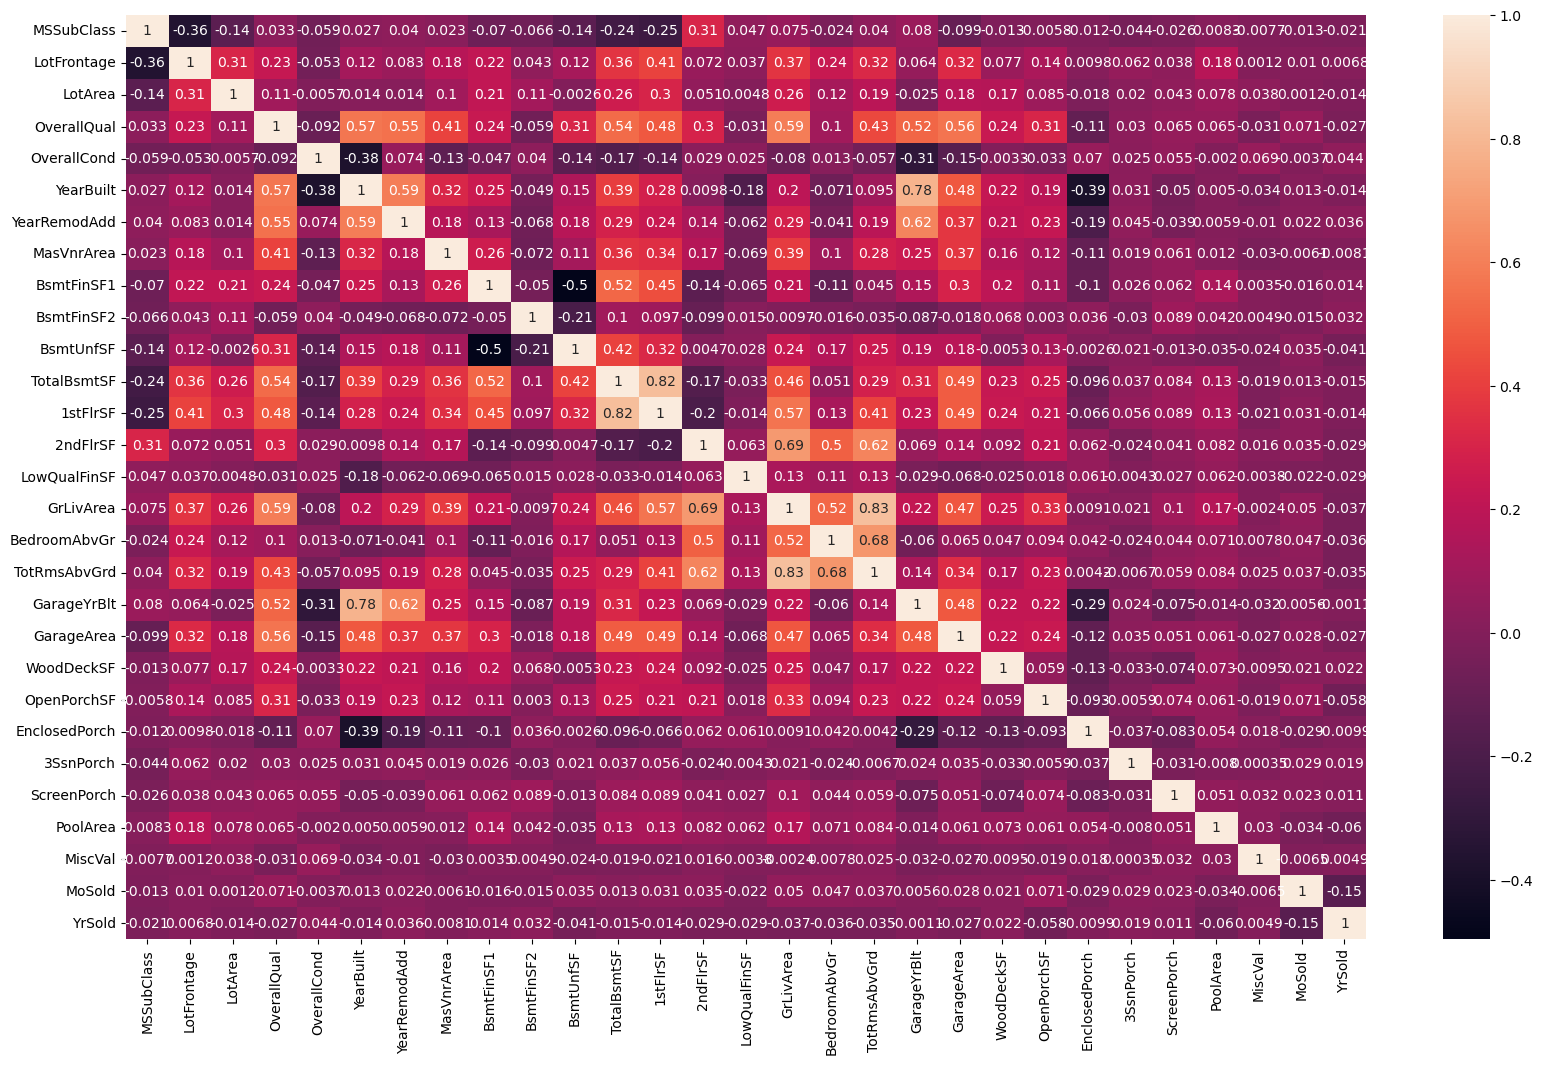

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df[num_cols].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_mat, annot=True)
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional_Sev,Functional_Typ,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_NoInfo,GarageQual_Po,GarageQual_TA
253,80,85.0,9350,6,7,1964,1991,108.0,270,580,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
643,60,80.0,10793,5,5,1969,1969,263.0,493,287,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
814,50,45.0,8248,5,7,1918,1950,0.0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
325,45,50.0,5000,5,6,1941,1950,0.0,116,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
920,60,70.0,8462,6,5,1994,1994,105.0,814,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
scalar = StandardScaler()
X_train[num_cols] = scalar.fit_transform(X_train[num_cols])
X_test[num_cols] = scalar.transform(X_test[num_cols])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional_Sev,Functional_Typ,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_NoInfo,GarageQual_Po,GarageQual_TA
253,0.547947,0.672307,-0.114575,-0.076345,1.270904,-0.246036,0.289056,0.043985,-0.387882,3.358599,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
643,0.073838,0.449651,0.023120,-0.812669,-0.523585,-0.081457,-0.775224,0.898709,0.090733,1.516118,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
814,-0.163216,-1.108942,-0.219731,-0.812669,1.270904,-1.760157,-1.694374,-0.551565,-0.967372,-0.288633,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
325,-0.281743,-0.886285,-0.529665,-0.812669,0.373660,-1.003096,-1.694374,-0.551565,-0.718406,-0.288633,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
920,0.073838,0.004339,-0.199310,-0.076345,-0.523585,0.741435,0.434185,0.027442,0.779682,-0.288633,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# print("MSE:", mean_squared_error(y_test, y_pred))
# print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
y_pred[:5], y_test[:5]

MAE: 173019139895884.44
MAPE: 2750610542.099657


(array([151440., 104688., 220080., 214832., 166096.]),
 1083    160000
 1009    102000
 1239    265900
 147     222500
 1198    178000
 Name: SalePrice, dtype: int64)

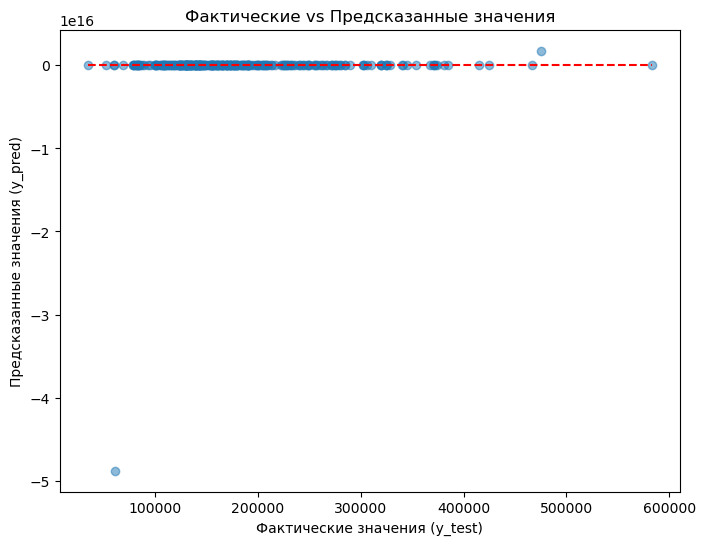

In [32]:
import matplotlib.pyplot as plt

# График фактических vs предсказанных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Линия y = x
plt.xlabel('Фактические значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Фактические vs Предсказанные значения')
plt.show()

In [48]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
df = pd.read_csv('./train.csv')
num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
            'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
            'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

target_name = 'SalePrice'
cat_cols = list(set(df.columns) - set(num_cols) - {target_name})

X = df.drop(target_name, axis=1)
# X[cat_cols] = X[cat_cols].apply(str)
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# threshold = 10 
for col in cat_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

#     known_categories = X_train[col].unique()
#     X_test = X_test[X_test[col].isin(known_categories)]
    
#     freq = X_train[col].value_counts()
#     rare_categories = freq[freq < threshold].index
#     X_train[col] = X_train[col].replace(rare_categories, 'Other')
#     X_test[col] = X_test[col].replace(rare_categories, 'Other')

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NoInfo')), 
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=200, random_state=42))  
])

# cat_index = [X_train.columns.get_loc(col) for col in cat_cols]
# for col in cat_index:
#     print(X_train.iloc(col).unique())

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     #передаем индексы категориальных колонок
#     ('model', CatBoostRegressor(n_estimators=500, cat_features=cat_index, random_state=41))
# ])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


MSE: 826883269.3297386
R^2 Score: 0.8921971321105957
MAE: 17615.76082245291


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [4, 23, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [45]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from catboost import CatBoostRegressor
df = pd.read_csv('./train.csv')
num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
            'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
            'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

target_name = 'SalePrice'
cat_cols = list(set(df.columns) - set(num_cols) - {target_name})

X = df.drop(target_name, axis=1)
y = df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NoInfo')), 
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


MSE: 871976457.537192
R^2 Score: 0.8863182042088188
MAE: 19209.00448293907


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [4, 23, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


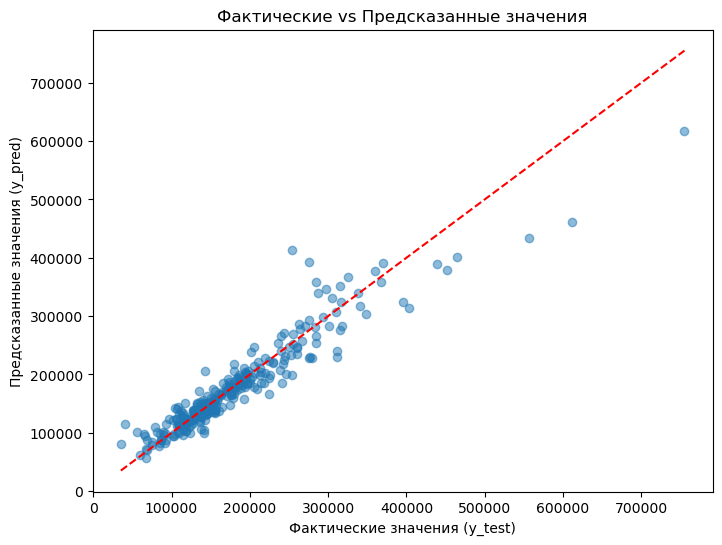

In [49]:
import matplotlib.pyplot as plt

# График фактических vs предсказанных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Линия y = x
plt.xlabel('Фактические значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Фактические vs Предсказанные значения')
plt.show()

In [50]:
test = pd.read_csv('./test.csv')
pred = pipeline.predict(test)
output = pd.DataFrame({"Id": test["Id"], "SalePrice":pred})
output

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 3, 5, 7, 8, 10, 11, 13, 15, 17, 19, 20, 21, 22, 23, 26, 27, 28, 30, 31, 37, 39, 40, 42, 43, 44, 46, 47, 48, 50] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Id,SalePrice
0,1461,129174.000000
1,1462,163544.656250
2,1463,194791.203125
3,1464,186399.609375
4,1465,197196.265625
...,...,...
1454,2915,85469.945312
1455,2916,81314.914062
1456,2917,168113.671875
1457,2918,121014.734375


In [51]:
output.to_csv("submission.csv", index=False)